In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r"C:\Users\kalai\Downloads\updated_student_dataset.csv")


In [2]:
categorical_cols = df.select_dtypes(include=['object', 'string']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [3]:
X = df.drop('dropout_yes', axis=1)
y = df['dropout_yes'] 

In [4]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


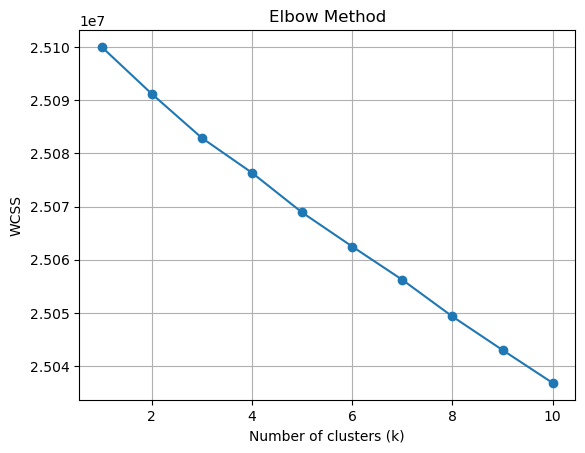

In [5]:
wcss = [] 

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [59]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.000
k=3, Silhouette Score=0.000
k=4, Silhouette Score=0.000
k=5, Silhouette Score=0.000
k=6, Silhouette Score=0.000
k=7, Silhouette Score=0.000
k=8, Silhouette Score=0.000
k=9, Silhouette Score=0.000
k=10, Silhouette Score=0.000


In [60]:
kmeans = KMeans(n_clusters=2, random_state=21, n_init=10)


In [61]:
X_kmeans = df.select_dtypes(include=['float64', 'int64', 'bool'])
cluster_labels = kmeans.fit_predict(X_kmeans)

In [62]:
df['Cluster'] = cluster_labels


In [63]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_kmeans.columns)
print("Centroids:")
print(centroids)


Centroids:
   jee_main_score  jee_advanced_score  mock_test_score_avg  class_12_percent  \
0       71.469899           78.575584            68.177701         75.156687   
1       72.446304           53.060521            68.044662         74.760648   

   attempt_count  daily_study_hours     id_ST5001     id_ST5002     id_ST5003  \
0       1.498792           4.492069 -7.589415e-19 -7.589415e-19 -7.589415e-19   
1       1.510334           4.475755  3.974563e-04  3.974563e-04  3.974563e-04   

      id_ST5004  ...  family_income_Mid  parent_education_Graduate  \
0 -7.589415e-19  ...           0.329710                   0.243961   
1  3.974563e-04  ...           0.333466                   0.245628   

   parent_education_PG  parent_education_Upto 10th  location_type_Semi-Urban  \
0             0.243961                    0.267713                  0.342593   
1             0.253975                    0.247615                  0.329094   

   location_type_Urban  peer_pressure_level_Low  pee

In [64]:
kmeans.fit(X_scaled) 
centroids_scaled = kmeans.cluster_centers_

centroids_scaled = kmeans.cluster_centers_ 
centroids_original = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(centroids_original, columns=X.columns)
print("Centroids (in original scale):")
print(centroids_df)


Centroids (in original scale):
   jee_main_score  jee_advanced_score  mock_test_score_avg  class_12_percent  \
0       74.741532           64.167914            66.932105         74.848502   
1       69.987247           66.850010            68.947582         75.034716   

   attempt_count  daily_study_hours     id_ST5001     id_ST5002     id_ST5003  \
0       1.509634           5.177071  2.439455e-19  2.439455e-19  4.816956e-04   
1       1.501026           3.991689  3.419973e-04  3.419973e-04  1.490778e-18   

      id_ST5004  ...  family_income_Low  family_income_Mid  \
0  2.439455e-19  ...           0.272640           0.445087   
1  3.419973e-04  ...           0.380643           0.251026   

   parent_education_Graduate  parent_education_PG  parent_education_Upto 10th  \
0                   0.407996             0.243256                    0.105010   
1                   0.128933             0.253078                    0.365937   

   location_type_Semi-Urban  location_type_Urban  pee

In [65]:
print("\nCluster assignment counts:")
print(df['Cluster'].value_counts())



Cluster assignment counts:
Cluster
1    2516
0    2484
Name: count, dtype: int64


In [66]:
comparison_table = pd.crosstab(df['dropout_yes'], df['Cluster'], rownames=['Actual'], colnames=['Cluster'])
print("\nCluster vs Actual Dropout:")
print(comparison_table)



Cluster vs Actual Dropout:
Cluster     0     1
Actual             
False    1992  1972
True      492   544


In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


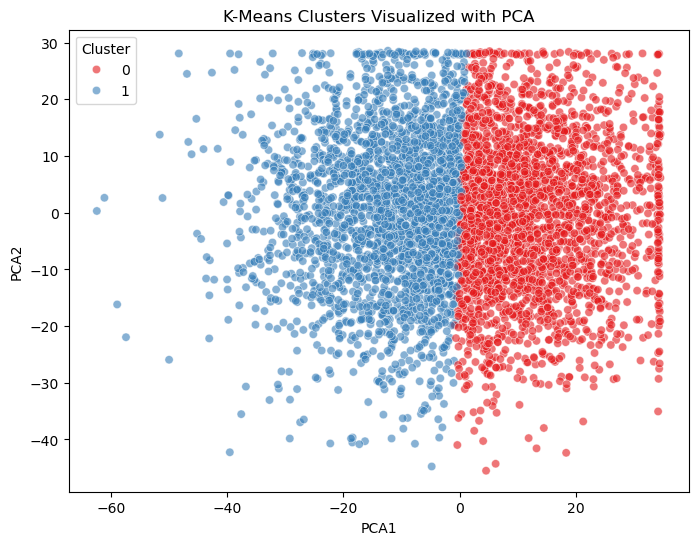

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.6)
plt.title("K-Means Clusters Visualized with PCA")
plt.show()
